In [2]:
import pandas as pd
import numpy as np
import html5lib

match = 'Коефіцієнт народжуваності в регіонах України'
coefficient_table = pd.DataFrame(pd.read_html(
    'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8',
    thousands="", decimal=",", match=match)[0])
coefficient_table.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


In [3]:
coefficient_table.shape

(28, 9)

In [5]:
coefficient_table.replace('—', np.nan, inplace=True)
coefficient_table.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [11]:
coefficient_table = coefficient_table.astype({'2014': 'float64', '2019': 'float64'})
coefficient_table.isna().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

In [31]:
coefficient_table.drop(index=27, inplace=True)

In [32]:
numeric_columns = coefficient_table.select_dtypes(include='number').columns
coefficient_table[numeric_columns] = coefficient_table[numeric_columns].fillna(
    coefficient_table[numeric_columns].mean())
coefficient_table

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000000,20.600000,16.000000,13.0,7.3,12.6,11.142308,8.020833
1,Вінницька,22.400000,19.200000,14.200000,12.4,8.4,11.2,10.900000,7.600000
2,Волинська,24.700000,25.000000,17.900000,15.3,11.2,14.8,14.100000,10.100000
3,Дніпропетровська,20.400000,20.400000,15.100000,12.3,7.1,11.2,11.100000,7.100000
4,Донецька,27.100000,21.400000,14.000000,10.9,6.1,9.8,8.200000,8.020833
5,Житомирська,26.100000,22.300000,15.900000,12.9,8.9,12.2,12.000000,7.900000
6,Закарпатська,31.400000,27.300000,20.700000,16.8,11.5,15.1,14.600000,10.400000
7,Запорізька,21.900000,19.700000,15.000000,12.4,7.1,10.6,10.600000,6.800000
8,Івано-Франківська,24.300000,24.800000,18.200000,15.5,10.3,12.4,12.200000,8.800000
9,Київська,20.400000,18.900000,15.600000,12.3,7.3,12.2,12.100000,8.000000


In [33]:
coefficient_table.loc[coefficient_table['2019'] > coefficient_table['2019'].mean()]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000000,20.600000,16.000000,13.0,7.3,12.6,11.142308,8.020833
2,Волинська,24.700000,25.000000,17.900000,15.3,11.2,14.8,14.100000,10.100000
4,Донецька,27.100000,21.400000,14.000000,10.9,6.1,9.8,8.200000,8.020833
6,Закарпатська,31.400000,27.300000,20.700000,16.8,11.5,15.1,14.600000,10.400000
8,Івано-Франківська,24.300000,24.800000,18.200000,15.5,10.3,12.4,12.200000,8.800000
11,Луганська,26.200000,23.500000,14.400000,11.6,6.2,9.6,5.100000,8.020833
12,Львівська,23.400000,24.000000,17.100000,14.0,9.1,11.9,11.900000,8.700000
14,Одеська,24.100000,19.200000,14.800000,12.6,8.0,12.7,12.300000,8.800000
16,Рівненська,26.900000,26.700000,19.300000,15.8,11.8,15.9,14.800000,10.700000
20,Херсонська,20.800000,21.400000,16.600000,14.3,8.5,11.7,11.500000,8.100000


In [57]:
coefficient_table.loc[coefficient_table['2014'] == coefficient_table['2014'].max()]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
16,Рівненська,26.9,26.7,19.3,15.8,11.8,15.9,14.8,10.7


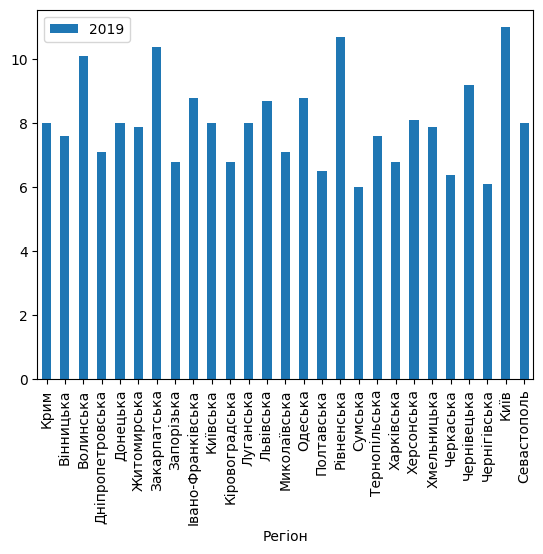

In [68]:
import matplotlib.pyplot as plt

data_2019 = coefficient_table[['Регіон', '2019']]
data_2019.plot(kind='bar', x='Регіон', y='2019')
plt.show()

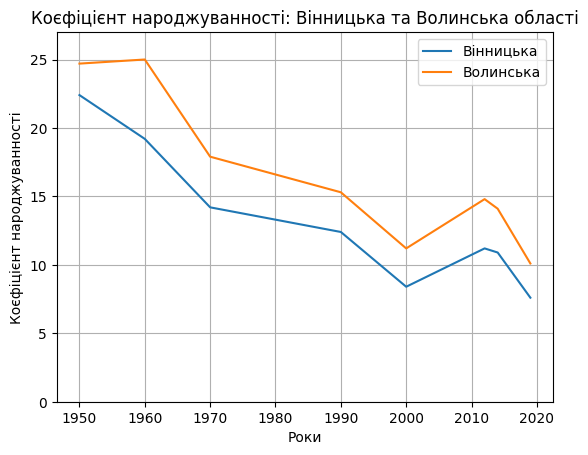

In [88]:
fig, axs = plt.subplots()
axs.plot([1950, 1960, 1970, 1990, 2000, 2012, 2014, 2019],
         coefficient_table.loc[coefficient_table['Регіон'] == 'Вінницька'].squeeze().values[1:], label='Вінницька')
axs.plot([1950, 1960, 1970, 1990, 2000, 2012, 2014, 2019],
         coefficient_table.loc[coefficient_table['Регіон'] == 'Волинська'].squeeze().values[1:], label='Волинська')
axs.set_xlabel('Роки')
axs.set_ylabel('Коєфіцієнт народжуванності')
axs.legend()
plt.ylim(0, 27)
plt.title('Коєфіцієнт народжуванності: Вінницька та Волинська області', fontsize=12)
plt.grid()
plt.show()

<Axes: >

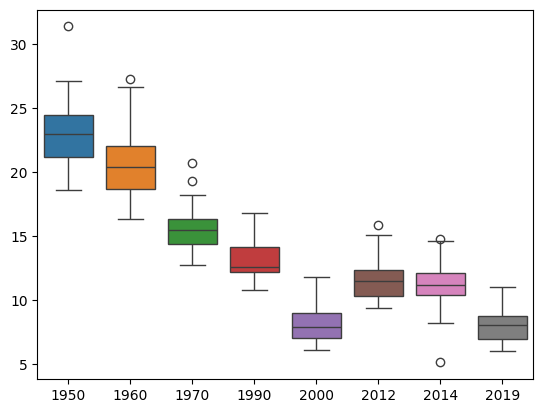

In [91]:
import seaborn as sns
sns.boxplot(data=coefficient_table)

<Axes: >

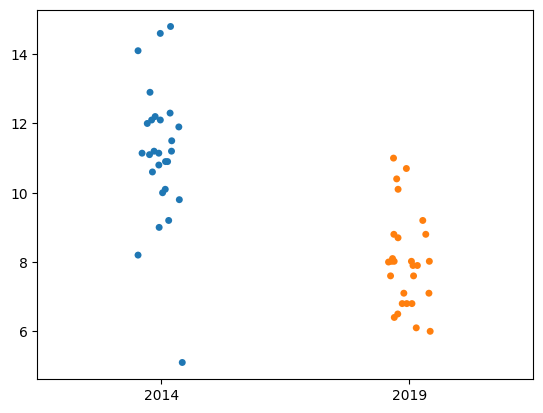

In [110]:
sns.stripplot(data=coefficient_table[['2014', '2019']])